In [1]:
import cv2
import mediapipe as mp
import numpy as np
import uuid
import os
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import joblib

In [2]:
# Carregar os dados
data = pd.read_csv('Exerc5.csv', sep = ',')
#data = data[data['gesture'] != 0]

In [3]:
data.head()

,landmark_0_x,landmark_1_x,landmark_2_x,landmark_3_x,landmark_4_x,landmark_5_x,landmark_6_x,landmark_7_x,landmark_8_x,landmark_9_x,...,landmark_12_z,landmark_13_z,landmark_14_z,landmark_15_z,landmark_16_z,landmark_17_z,landmark_18_z,landmark_19_z,landmark_20_z,gesture
0,0.439059,0.730311,0.000001,0.600150,0.724010,-0.065322,0.730003,0.699539,-0.097175,0.841773,...,0.327486,0.510103,-0.092211,0.294401,0.477689,-0.114608,0.271758,0.446853,-0.126847,0
1,0.454067,0.720692,0.000001,0.609146,0.716737,-0.062145,0.736309,0.699221,-0.090921,0.846996,...,0.325481,0.509938,-0.080956,0.293786,0.477239,-0.098791,0.273742,0.446248,-0.111167,0
2,0.447479,0.723511,0.000001,0.601860,0.716982,-0.066425,0.733183,0.698983,-0.100151,0.844803,...,0.324301,0.509753,-0.088821,0.292228,0.477025,-0.104823,0.271783,0.446258,-0.115180,0
3,0.446450,0.720512,0.000001,0.602180,0.715364,-0.065631,0.733798,0.698537,-0.097192,0.847740,...,0.324190,0.508620,-0.081061,0.293011,0.475873,-0.098101,0.273753,0.444940,-0.109386,0
4,0.445827,0.719480,0.000001,0.599920,0.714304,-0.065826,0.731575,0.697815,-0.098783,0.845375,...,0.322700,0.508083,-0.089317,0.292382,0.475058,-0.105651,0.273668,0.443990,-0.116440,0


In [4]:
X = data.drop(columns=['gesture'])
y = data['gesture']

In [6]:
#Converter rótulo
label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)  #"Mão aberta" -> 0, "Mão fechada" -> 1

In [7]:
#divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
#treino do modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
#Avaliação
y_pred = model.predict(X_test)
print("Precisao:", accuracy_score(y_test, y_pred))

Precisao: 1.0


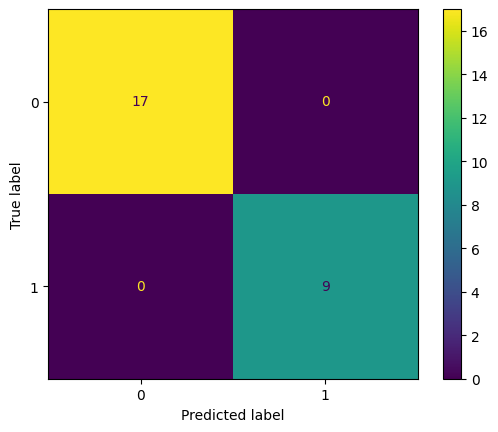

In [10]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [11]:
#Salvar modelo
joblib.dump(model, 'Modelo_Exercicio5.pkl')

['Modelo_Exercicio5.pkl']